Dataframe rotulado:


,Frases,Sentimento
0,Não consigo dormir bem à noite,negativo
1,O café da manhã é minha refeição favorita,muito positivo
2,Fui a um show incrível ontem à noite,muito positivo
3,Preciso começar a estudar para as provas,positivo
4,Adoro assistir a filmes antigos,muito positivo
5,Não gosto de multidões em lugares públicos,muito negativo
6,Quero aprender a tocar um instrumento musical,muito positivo
7,O trânsito deixa meu dia mais estressante,neutro
8,Gosto de passar tempo ao ar livre,muito positivo
9,O novo restaurante da cidade é maravilhoso,muito positivo


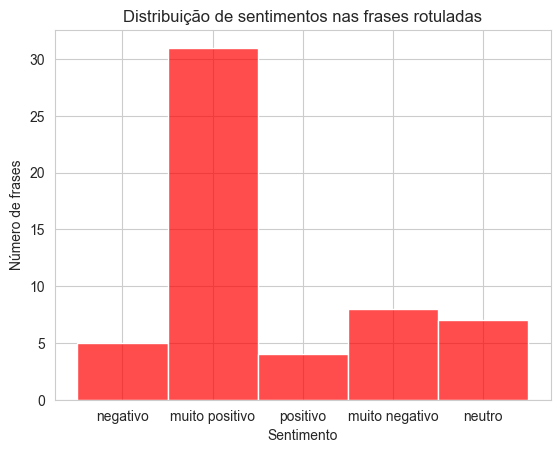

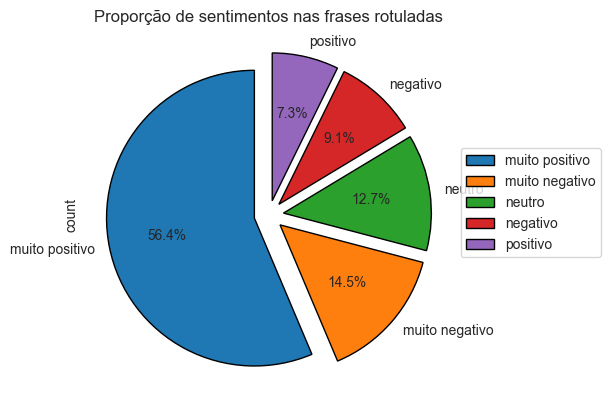

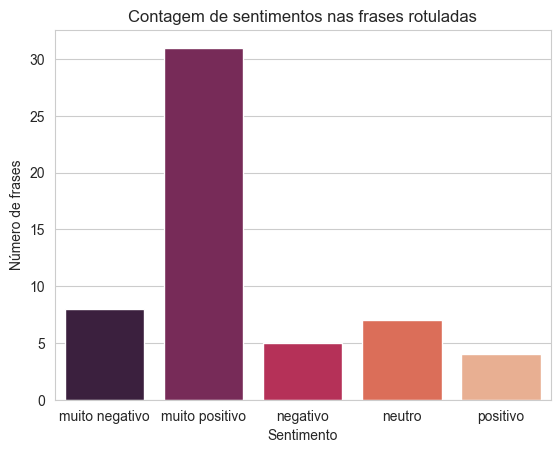

In [20]:
# Importar as bibliotecas necessárias
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o modelo BERT pré-treinado para classificação de sentimentos
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Definir as categorias de sentimento
sentiment_names = ["muito negativo", "negativo", "neutro", "positivo", "muito positivo"]

# Função para rotular uma frase com o sentimento correspondente
def label_sentiment(text):
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt")
    outputs = model(**inputs)
    predicted_class = torch.argmax(outputs.logits)
    return sentiment_names[predicted_class.item()]

# Carregar os dados
df = pd.read_json("data.json")

# Aplicar a função a cada frase no DataFrame
df["Sentimento"] = df["Frases"].apply(label_sentiment)

# Mostrar o dataframe rotulado
print("Dataframe rotulado:")
display(df)

# Gerar gráficos para análise de sentimentos

# Histograma da distribuição de sentimentos
sns.histplot(df["Sentimento"], color="red", alpha=0.7)
sns.set_style("whitegrid")
plt.title("Distribuição de sentimentos nas frases rotuladas")
plt.xlabel("Sentimento")
plt.ylabel("Número de frases")
plt.show()

# Gráfico de pizza da proporção de sentimentos
df["Sentimento"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90, 
                                     explode=[0.1, 0.1, 0.1, 0.1, 0.1], 
                                     wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
plt.title("Proporção de sentimentos nas frases rotuladas")
plt.legend(bbox_to_anchor=(1, 0.7))
plt.show()

# Gráfico de barras da contagem de sentimentos
counts = df["Sentimento"].value_counts().sort_index()
sns.barplot(x=counts.index, y=counts.values, palette="rocket")
plt.title("Contagem de sentimentos nas frases rotuladas")
plt.xlabel("Sentimento")
plt.ylabel("Número de frases")
plt.show()

